In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data = pd.read_csv('trips_clean.csv')
#print data.values
dist =  data[['gender','trip_duration']]

In [4]:
distVals = dist.values
mean = np.mean(dist[['trip_duration']])
stdDev = np.std(dist[['trip_duration']])
T = abs(dist[['trip_duration']] - mean) < .75 * stdDev
#T = abs(dist[['trip_duration']])  < 2000
#print T
data_wo_outlier = distVals[np.array(T).flatten()]

/home/andewan/.local/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [5]:
male=[]
female=[]
for i in data_wo_outlier:
    if(i[0]==1):
        male.append(i[1])
    elif(i[0]==2):
        female.append(i[1])
print len(male)

15532591


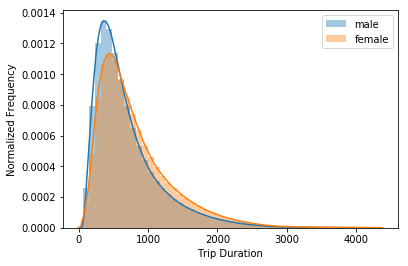

In [8]:
sns.distplot(male,label='male')
sns.distplot(female, label = 'female')
plt.xlabel('Trip Duration')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()

In [53]:
#stats.ks_2samp(male,female)

In [54]:
#from math import sqrt
#male_mean = np.mean(male)
#female_mean = np.mean(female)
#male_var = sum([(i-male_mean)**2 for i in male])/len(male)
#female_var = sum([(i-female_mean)**2 for i in female])/len(female)
##wald = abs(male_mean - female_mean)/sqrt((male_var/len(male))+(female_var/len(female)))
#wald = abs(male_mean - female_mean)/sqrt((abs(male_mean*(1-male_mean))/len(male))+(abs(female_mean*(1-female_mean))/len(female)))
#print wald

In [57]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-434.0775779739932, pvalue=0.0)